In [2]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


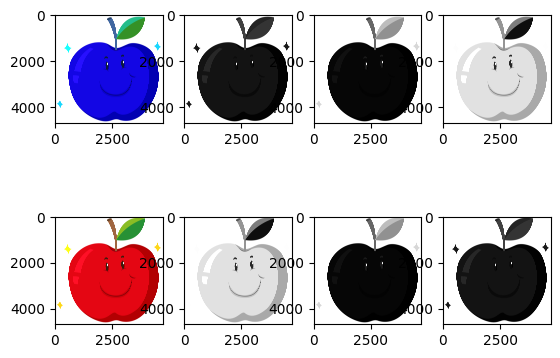

In [3]:
img = cv.imread('apple.jpg')
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(2, 4, 1)
plt.imshow(img)
plt.subplot(2, 4, 2)
plt.imshow(img[:, :, 0], cmap='gray')
plt.subplot(2, 4, 3)
plt.imshow(img[:, :, 1], cmap='gray')
plt.subplot(2, 4, 4)
plt.imshow(img[:, :, 2], cmap='gray')
plt.subplot(2, 4, 5)
plt.imshow(img2)
plt.subplot(2, 4, 6)
plt.imshow(img2[:,:, 0], cmap='gray')
plt.subplot(2, 4, 7)
plt.imshow(img2[:, :, 1], cmap='gray')
plt.subplot(2, 4, 8)
plt.imshow(img2[:, :, 2], cmap='gray')

1.1.2

X(H , W, CH)
(200, 200, 3)
Tranpose Y(CH, H, W) --> (3, 200, 200)
Moveaxis Y(CH, H, W) --> (3, 200, 200)
Reshape Image Y(CH, H, W) --> (3, 200, 200)


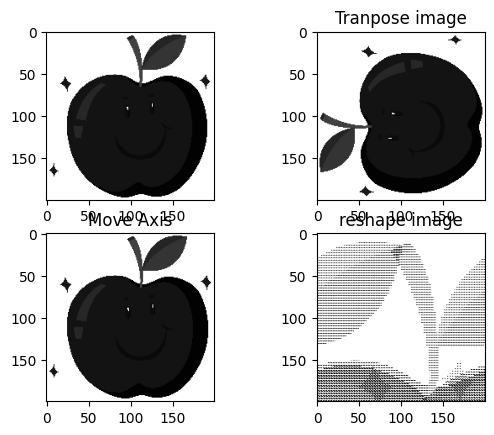

In [56]:
print('X(H , W, CH)')
print(img2.shape)
plt.subplot(2, 2, 1)
plt.imshow(img2[:,:, 0], cmap='gray')

tranpose_image = np.transpose(img2)
print(f'Tranpose Y(CH, H, W) --> {tranpose_image.shape}')
plt.subplot(2, 2, 2)
plt.title("Tranpose image")
plt.imshow(tranpose_image[0, :, :], cmap='gray')

moveaxis_image = np.moveaxis(img2, 2, 0)
print(f'Moveaxis Y(CH, H, W) --> {moveaxis_image.shape}')
plt.subplot(2, 2, 3)
plt.title("Move Axis")
plt.imshow(moveaxis_image[0, :, :], cmap = "gray")

height, width, channels = img2.shape
img_reshape = np.reshape(img2, (channels, height, width))
print(f"Reshape Image Y(CH, H, W) --> {img_reshape.shape}")
plt.subplot(2, 2, 4)
plt.title('reshape image')
plt.imshow(img_reshape[0, :, :], cmap= "gray")


1.1.4

(4681, 4700)
(200, 200)


Text(0.5, 0, 'Intensity')

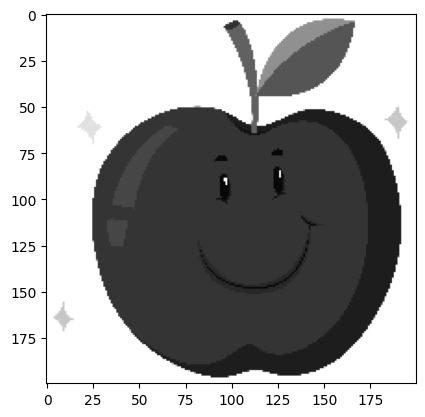

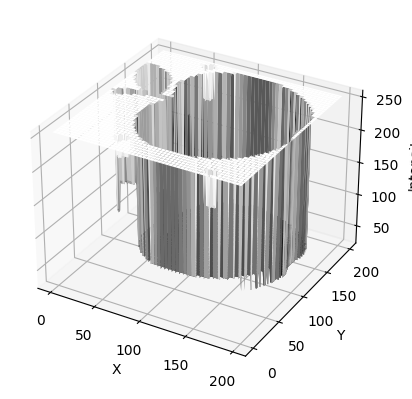

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
resize_img  = cv.resize(gray_img, (200, 200))

plt.imshow(resize_img, cmap='gray')
x_coords, y_coords = np.mgrid[0:resize_img.shape[0], 0:resize_img.shape[1]]
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x_coords, y_coords, resize_img, cmap='gray')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')

In [55]:
img_1 = cv.imread("me2.jpg")
resize_img1 = cv.resize(img_1, (200, 200))
resize_img2 = cv.resize(img2, (200, 200))

output_file = "output_file.mp4"
fourcc = cv.VideoWriter_fourcc(*'mp4v')

fps = 1
frame = 100
trans_duration = 30

out = cv.VideoWriter(output_file, fourcc, fps, (resize_img1.shape[1], resize_img1.shape[0]))

w = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]


#Move IMG 1 to IMG 2
for w1, w2 in zip(w, w[::-1]):
    image_result = cv.addWeighted(resize_img1, w1, resize_img2, w2, 0)
    out.write(image_result)
    
#MOVE iMG2 TO IMG1
for w2, w1 in zip(w, w[::-1]):
    image_result = cv.addWeighted(resize_img1, w1, resize_img2, w2, 0)
    out.write(image_result)


out.release()

#t
